In [1]:
import SimpleITK as sitk
import numpy as np
import h5py
import os
from numpy.random import default_rng
import matplotlib.pyplot as plt

# image folder
oai_folder = '/playpen-raid/qinliu/data/OAI/oai_cropped_320'
oai_ood_folder = '/playpen-raid/qinliu/data/OAI/oai_cropped_320_ood'
output_folder = '/playpen-raid/qinliu/data/OAI/temp_mask'


In [ ]:
# def save_h5_as_nifty(h5_file_path, image_name, save_folder):
#     with h5py.File(h5_file_path, 'r') as data:
#         image = data['reconstruction_esc']
#         image_itk = sitk.GetImageFromArray(image)
#         sitk.WriteImage(image_itk, os.path.join(save_folder, '{}.nii.gz'.format(image_name)))

# id_image_names = os.listdir(oai_folder)
# ood_image_names = os.listdir(oai_ood_folder)

# for image_name in id_image_names[:73]:
#     print(image_name)
#     image_path = os.path.join(oai_folder, image_name)
#     save_h5_as_nifty(image_path, image_name, output_folder)

# for image_name in ood_image_names[:]:
#     print(image_name)
#     image_path = os.path.join(oai_ood_folder, image_name)
#     save_h5_as_nifty(image_path, image_name, output_folder)

In [26]:
def rec(file_path, image_name, output_folder, ratio=0.50):

    with h5py.File(file_path, 'r') as data:
        kspace = data['kspace']

        image = np.fft.ifftshift(kspace, axes=(1,2))
        image = np.fft.ifft2(image)
        image = np.fft.ifftshift(image, axes=(1,2))
        image_rec = []
        for i in range(image.shape[0]):
            image_slice = np.linalg.norm(np.stack([image[i].real, image[i].imag], axis=-1), axis=2)
            image_rec.append(image_slice)
        image_rec = np.stack(image_rec, axis=0)

        mask = np.zeros(kspace.shape)
        rng = default_rng()
        mask[:, :, 140:180] = 1
        sample_size = int((mask.shape[2] * ratio - 40) // 2)
        numbers_low = rng.choice(range(0, 140), size=sample_size, replace=False)
        numbers_high = rng.choice(range(180, 320), size=sample_size, replace=False)
        for n in list(numbers_low) + list(numbers_high):
            mask[:, :, n] = 1
        kspace_masked = mask * kspace
        image_masked = np.fft.ifftshift(kspace_masked, axes=(1,2))
        image_masked = np.fft.ifft2(image_masked)
        image_masked = np.fft.ifftshift(image_masked, axes=(1,2))

        image_masked_rec = []
        for i in range(image.shape[0]):
            image_slice = np.linalg.norm(np.stack([image_masked[i].real, image_masked[i].imag], axis=-1), axis=2)
            image_masked_rec.append(image_slice)
        image_masked_rec = np.stack(image_masked_rec, axis=0)

        image_itk_masked = sitk.GetImageFromArray(image_masked_rec)
        sitk.WriteImage(image_itk_masked, os.path.join(output_folder, '{}_rec50.nii.gz'.format(image_name)))


In [27]:
rec50_output_folder = '/playpen-raid/qinliu/data/OAI/temp_mask_rec50'

file_names = os.listdir(output_folder)
valid_file_names = []
for file_name in file_names:
    if file_name.endswith('.nii.gz') and 'rec' not in file_name:
        valid_file_names.append(file_name)

for file_name in valid_file_names:
    print(file_name)
    valid_file_name = file_name.split('.nii.gz')[0]
    if '_0' in valid_file_name:
        file_path = os.path.join(oai_folder, valid_file_name)
    else:
        file_path = os.path.join(oai_ood_folder, valid_file_name)

    rec(file_path, valid_file_name, rec50_output_folder)

9001695l_0.h5.nii.gz
9001897l_0.h5.nii.gz
9003126l_0.h5.nii.gz
9003126r_0.h5.nii.gz
9003175l_0.h5.nii.gz
9003175r_0.h5.nii.gz
9003316l_0.h5.nii.gz
9003430l_0.h5.nii.gz
9003658l_0.h5.nii.gz
9003658r_0.h5.nii.gz
9003815l_0.h5.nii.gz
9003815r_0.h5.nii.gz
9004184r_0.h5.nii.gz
9004315l_0.h5.nii.gz
9004315r_0.h5.nii.gz
9004669l_0.h5.nii.gz
9004669r_0.h5.nii.gz
9005075l_0.h5.nii.gz
9005075r_0.h5.nii.gz
9005321l_0.h5.nii.gz
9005321r_0.h5.nii.gz
9005413l_0.h5.nii.gz
9005413r_0.h5.nii.gz
9005656l_0.h5.nii.gz
9005656r_0.h5.nii.gz
9006140l_0.h5.nii.gz
9006140r_0.h5.nii.gz
9006407l_0.h5.nii.gz
9007904l_0.h5.nii.gz
9007904r_0.h5.nii.gz
9008820l_0.h5.nii.gz
9008820r_0.h5.nii.gz
9009067l_0.h5.nii.gz
9009067r_0.h5.nii.gz
9009623l_0.h5.nii.gz
9009623r_0.h5.nii.gz
9009927l_0.h5.nii.gz
9009957l_0.h5.nii.gz
9010308l_0.h5.nii.gz
9010308r_0.h5.nii.gz
9010370l_0.h5.nii.gz
9010952l_0.h5.nii.gz
9010952r_0.h5.nii.gz
9011115l_0.h5.nii.gz
9011115r_0.h5.nii.gz
9011641l_0.h5.nii.gz
9011641r_0.h5.nii.gz
9011949l_0.h5

In [2]:
output_folder = '/playpen-raid/qinliu/data/OAI/temp_mask'
if not os.path.isdir(output_folder):
    os.makedirs(output_folder)

oai_file_name = os.path.join(oai_folder, oai_image_name)
with h5py.File(oai_file_name, 'r') as data:
    image = data['reconstruction_esc']
    image_itk = sitk.GetImageFromArray(image)
    sitk.WriteImage(image_itk, os.path.join(output_folder, '{}.nii.gz'.format(oai_image_name)))

oai_ood_file_name = os.path.join(oai_ood_folder, oai_ood_image_name)
with h5py.File(oai_ood_file_name, 'r') as data_ood:
    image_ood = data_ood['reconstruction_esc']
    image_itk_ood = sitk.GetImageFromArray(image_ood)
    sitk.WriteImage(image_itk_ood, os.path.join(output_folder, '{}.nii.gz'.format(oai_ood_image_name)))

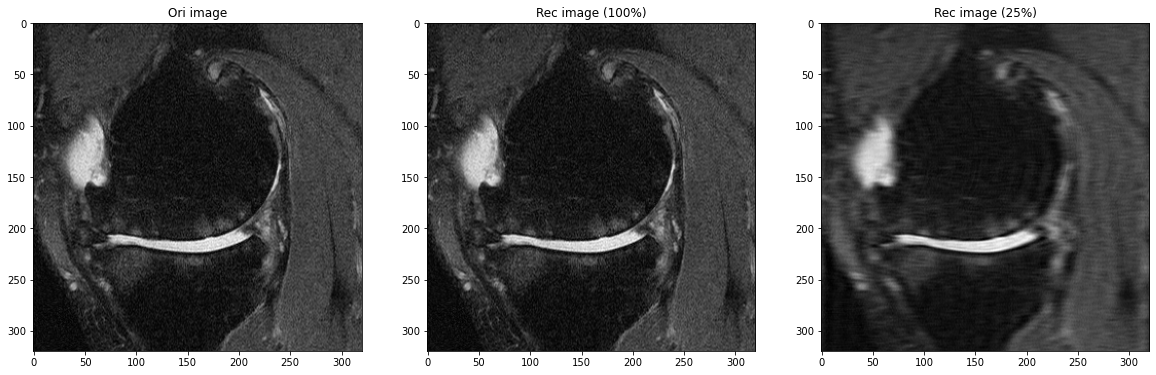

In [3]:
slice_idx = 10
with h5py.File(oai_ood_file_name, 'r') as data:
    image_ori = data['reconstruction_esc']
    kspace = data['kspace']

    # display a slice
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.title('Ori image')
    plt.imshow(image_ori[slice_idx], cmap='gray')

    plt.subplot(132)
    plt.title('Rec image (100%)')
    image = np.fft.ifftshift(kspace, axes=(1,2))
    image = np.fft.ifft2(image)
    image = np.fft.ifftshift(image, axes=(1,2))
    image_rec = []
    for i in range(image.shape[0]):
        image_slice = np.linalg.norm(np.stack([image[i].real, image[i].imag], axis=-1), axis=2)
        image_rec.append(image_slice)
    image_rec = np.stack(image_rec, axis=0)
    plt.imshow(image_rec[slice_idx], cmap='gray')

    plt.subplot(133)
    plt.title('Rec image (25%)')

    mask = np.zeros(kspace.shape)
    rng = default_rng()
    mask[:, :, 140:180] = 1
    numbers_low = rng.choice(range(0, 140), size=20, replace=False)
    numbers_high = rng.choice(range(180, 320), size=20, replace=False)
    for n in list(numbers_low) + list(numbers_high):
        mask[:, :, n] = 1
    kspace_masked = mask * kspace
    image_masked = np.fft.ifftshift(kspace_masked, axes=(1,2))
    image_masked = np.fft.ifft2(image_masked)
    image_masked = np.fft.ifftshift(image_masked, axes=(1,2))

    image_masked_rec = []
    for i in range(image.shape[0]):
        image_slice = np.linalg.norm(np.stack([image_masked[i].real, image_masked[i].imag], axis=-1), axis=2)
        image_masked_rec.append(image_slice)
    image_masked_rec = np.stack(image_masked_rec, axis=0)
    plt.imshow(image_masked_rec[slice_idx], cmap='gray')

    image_itk_masked = sitk.GetImageFromArray(image_masked_rec)
    sitk.WriteImage(image_itk_masked, os.path.join(output_folder, '{}_masked.nii.gz'.format(oai_ood_image_name)))


In [13]:
import ants

moving_image_path = os.path.join(output_folder, '9292027r_0.h5_masked.nii.gz')
fixed_image_path = os.path.join(output_folder, '9292027r_0.h5.nii.gz')

# moving_image_path = os.path.join(output_folder, '9291078r_4.h5_masked.nii.gz')
# fixed_image_path = os.path.join(output_folder, '9291078r_4.h5.nii.gz')


moving_image = ants.image_read(moving_image_path)
fixed_image = ants.image_read(fixed_image_path)

print(moving_image.shape, fixed_image.shape)

(320, 320, 37) (320, 320, 37)


In [14]:
reg_aff = ants.registration(moving=moving_image, fixed=fixed_image, type_of_transform='SyN')
print(reg_aff)

{'warpedmovout': ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (320, 320, 37)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
, 'warpedfixout': ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (320, 320, 37)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
, 'fwdtransforms': ['/tmp/tmp3m537cpq1Warp.nii.gz', '/tmp/tmp3m537cpq0GenericAffine.mat'], 'invtransforms': ['/tmp/tmp3m537cpq0GenericAffine.mat', '/tmp/tmp3m537cpq1InverseWarp.nii.gz']}


In [6]:
jac = ants.create_jacobian_determinant_image(fixed_image, reg_aff['fwdtransforms'][0], 1)
print(jac)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (320, 320, 37)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



In [15]:
slice_id = 10
moving_image_slice = ants.from_numpy(moving_image[:,:,slice_id])
fixed_image_slice = ants.from_numpy(fixed_image[:, :, slice_id])
reg_aff_slice = ants.registration(
    moving=moving_image_slice, 
    fixed=fixed_image_slice,
    flow_sigma=2.0, 
    type_of_transforms='SyN')

jac_slice = ants.create_jacobian_determinant_image(fixed_image_slice, reg_aff_slice['fwdtransforms'][0], 1)


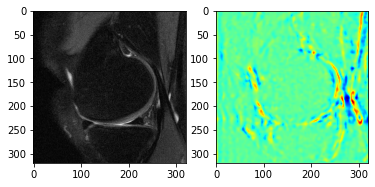

In [22]:
import cv2
from mpl_toolkits.axes_grid1 import make_axes_locatable

fixed_image_slice_npy = fixed_image_slice.numpy().transpose()
fixed_image_slice_norm = (fixed_image_slice_npy - np.min(fixed_image_slice_npy)) / \
    (np.max(fixed_image_slice_npy) - np.min(fixed_image_slice_npy))

img = np.float32(fixed_image_slice_norm)
jac_slice_npy = np.transpose(jac_slice.numpy())

plt.subplot(121)
plt.imshow(img, cmap='gray')

ax = plt.subplot(122)
im = ax.imshow(jac_slice_npy, cmap='jet')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

# plt.hist(jac_slice_npy, density=True, bins=30)  # density=False would make counts
# plt.ylabel('Counts')
# plt.xlabel('Value')
# plt.show()

# jac_slice_npy_norm = (jac_slice_npy - min_val) / (max_val - min_val)

# heat_map = cv2.applyColorMap(np.uint8(255 * (1 - jac_slice_npy_norm)), cv2.COLORMAP_JET)
# heat_map = np.float32(heat_map) / 255


# img_overlay = img_rgb + heat_map * 0.35
# img_overlay = img_overlay / np.max(img_overlay)

# # Plot for normal case
# fig, ax = plt.subplots(figsize=(5,5))
# im = ax.imshow(img_overlay, cmap='jet')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(im, cax=cax)
# plt.show()


